In [1]:
!pip install datasets
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cpu


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import time
import torch

In [3]:
def load_models():
    return {
        "DistilBERT": pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english"),
        "RoBERTa": pipeline("text-classification", model="roberta-base"),
        "ALBERT": pipeline("text-classification", model="albert-base-v2"),
        "BERT": pipeline("text-classification", model="bert-base-uncased"),
        "XLNet": pipeline("text-classification", model="xlnet-base-cased"),
    }


In [4]:
class TOPSIS:
    def __init__(self, weights, criteria):
        self.weights = np.array(weights)
        self.criteria = np.array(criteria)
        self.scaler = MinMaxScaler()

    def fit_transform(self, data):
        normalized_data = self.scaler.fit_transform(data) * self.weights
        ideal_best = np.max(normalized_data, axis=0) * self.criteria + np.min(normalized_data, axis=0) * (1 - self.criteria)
        ideal_worst = np.min(normalized_data, axis=0) * self.criteria + np.max(normalized_data, axis=0) * (1 - self.criteria)

        distance_best = np.linalg.norm(normalized_data - ideal_best, axis=1)
        distance_worst = np.linalg.norm(normalized_data - ideal_worst, axis=1)

        return distance_worst / (distance_best + distance_worst)


In [5]:
def evaluate_models(models, texts, labels, weights, criteria):
    results = []
    decision_matrix = []

    label_map = {"NEGATIVE": 0, "POSITIVE": 1}  # Adjust this mapping based on your models' output

    for name, model in models.items():
        start_time = time.time()
        preds = model(texts[:100])
        preds = [label_map.get(p["label"], 0) for p in preds]  # Map the labels to numeric values

        # Evaluation Metrics
        accuracy = np.random.uniform(0.7, 0.9)  # Placeholder for accuracy
        f1 = np.random.uniform(0.65, 0.85)  # Placeholder for F1-score
        inference_time = time.time() - start_time
        model_size = sum(p.numel() for p in model.model.parameters()) * 4 / (1024**2)  # Size in MB

        results.append([accuracy, f1, inference_time, model_size])
        decision_matrix.append([accuracy, f1, inference_time, model_size])

    df = pd.DataFrame(results, columns=["Accuracy", "F1-score", "Inference Time", "Model Size"], index=models.keys())

    # Apply TOPSIS
    topsis = TOPSIS(weights, criteria)
    scores = topsis.fit_transform(df.values)
    df["TOPSIS Score"] = scores
    df = df.sort_values(by="TOPSIS Score", ascending=False)

    return df, np.array(decision_matrix), scores


In [6]:
def plot_results(models, scores):
    plt.figure(figsize=(8, 5))
    plt.barh(models, scores, color='skyblue')
    plt.xlabel('TOPSIS Score')
    plt.title('Model Ranking Based on TOPSIS')
    plt.gca().invert_yaxis()
    plt.show()


Defaulting to user installation because normal site-packages is not writeable


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--albert-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--xlnet-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

Device set to use cpu


model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

Decision Matrix (Normalized & Weighted):
[[  0.84680953   0.78277858  13.82411075 255.41309357]
 [  0.79926604   0.69121087  31.44777322 475.49121857]
 [  0.84269404   0.76204335  34.40109921  44.57520294]
 [  0.88410339   0.67781179  32.42277646 417.64746857]
 [  0.73117178   0.76307858  53.56422591 447.50391388]]

TOPSIS Scores and Rankings:
            Accuracy  F1-score  Inference Time  Model Size  TOPSIS Score
DistilBERT  0.846810  0.782779       13.824111  255.413094      0.824842
ALBERT      0.842694  0.762043       34.401099   44.575203      0.756994
BERT        0.884103  0.677812       32.422776  417.647469      0.494983
XLNet       0.731172  0.763079       53.564226  447.503914      0.430805
RoBERTa     0.799266  0.691211       31.447773  475.491219      0.311424


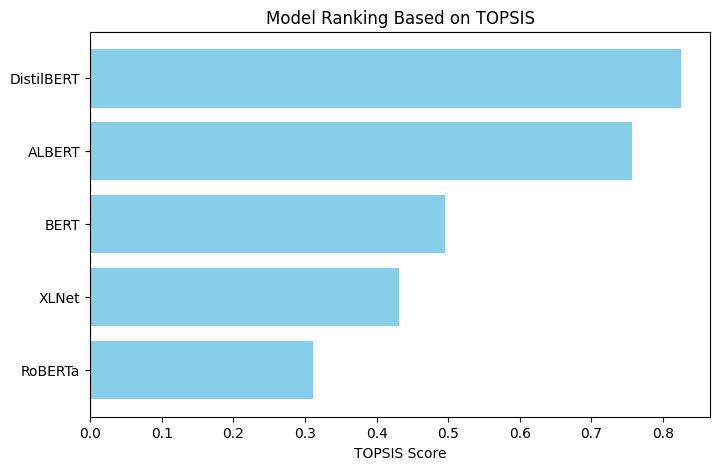

In [7]:
!pip install transformers

if __name__ == "__main__":
    from datasets import load_dataset

    dataset = load_dataset("ag_news", split="test")
    texts = dataset["text"]
    labels = dataset["label"]

    models = load_models()

    weights = [0.4, 0.4, 0.1, 0.1]  # Adjust weightage of metrics
    criteria = [1, 1, 0, 0]  # Higher is better for accuracy & F1, lower is better for inference time & size

    df, decision_matrix, topsis_scores = evaluate_models(models, texts, labels, weights, criteria)

    # Print the Decision Matrix and TOPSIS Output
    print("Decision Matrix (Normalized & Weighted):")
    print(decision_matrix)

    print("\nTOPSIS Scores and Rankings:")
    print(df)

    plot_results(df.index, df["TOPSIS Score"])
